In [1]:
print("Allah")

Allah


In [2]:
# Exercise
# Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

# Now do some exploratory data analysis to figure out which variables 
# have direct and clear impact on employee retention (i.e. whether 
# they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<AxesSubplot:xlabel='Department'>

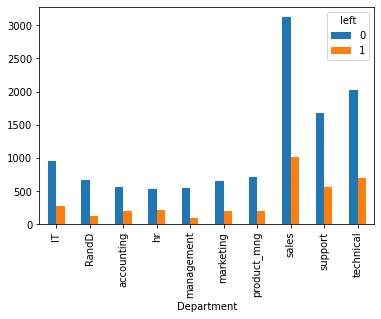

In [6]:
pd.crosstab(df.Department,df.left).plot(kind ='bar')

<AxesSubplot:xlabel='salary'>

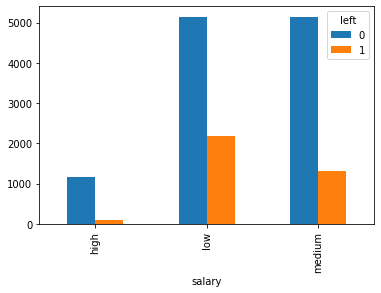

In [7]:
pd.crosstab(df.salary,df.left).plot(kind ='bar')

<AxesSubplot:xlabel='time_spend_company'>

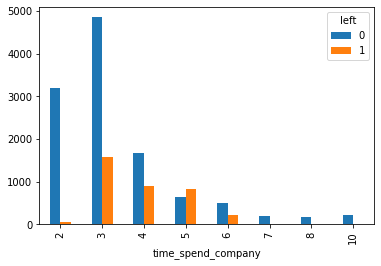

In [8]:
pd.crosstab(df.time_spend_company,df.left).plot(kind= 'bar')

<AxesSubplot:xlabel='average_montly_hours'>

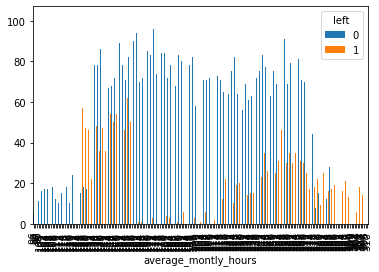

In [9]:
pd.crosstab(df.average_montly_hours,df.left).plot(kind ='bar')

<AxesSubplot:xlabel='satisfaction_level'>

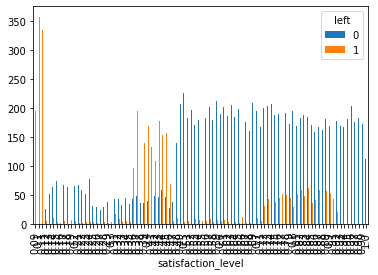

In [10]:
pd.crosstab(df.satisfaction_level,df.left).plot(kind='bar')

<AxesSubplot:xlabel='number_project'>

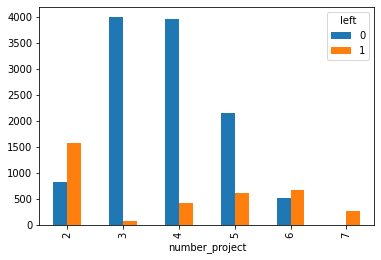

In [11]:
pd.crosstab(df.number_project,df.left).plot(kind ='bar')

In [12]:
df.groupby(df.left).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [13]:
# 0 Means retain Job
# 1 Means left Job
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [14]:
df.shape

(14999, 10)

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
# Salary Columns is in text format or Categorical Data Convert into Dummies vaiable
dummies = pd.get_dummies(df.salary,prefix = 'salary')
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [17]:
# now dummies and original data is combined with Concatenate function
df = pd.concat([df,dummies],axis= 'columns')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [18]:
df.drop(columns =['salary'],inplace =True)

In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [28]:
X = df[['satisfaction_level','average_montly_hours','time_spend_company', 'promotion_last_5years']]
X.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,157,3,0
1,0.80,262,6,0
2,0.11,272,4,0
3,0.72,223,5,0
4,0.37,159,3,0


In [29]:
X = pd.concat([X,dummies],axis= 1)
X

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,1,0
14995,0.37,160,3,0,0,1,0
14996,0.37,143,3,0,0,1,0
14997,0.11,280,4,0,0,1,0


In [30]:
y = df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [32]:
model.score(X,y)

0.7680512034135609

# Test Train Split methhod


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [34]:
len(X_train)

11999

In [36]:
len(y_train)

11999

In [40]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.score(X_train,y_train)

0.7647303941995166

In [46]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)